<a href="https://colab.research.google.com/github/Chuliyka/Artificial-Intelligence/blob/main/Task3_basic_ai_Chuliy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [2]:
DataSet = pd.read_csv("titanic.csv")
print(DataSet.describe())
print(DataSet.info())
print(f"Розмірність датасету: {DataSet.shape}\n")
print(f"{DataSet.dtypes}\n")
print(f"{DataSet.value_counts()}\n")
print(f"{DataSet.head}\n")

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [3]:
DataSet.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки:

Це визначення демонструє, що найбільша кількість даних, які відсутні, належить категоріям Age та Cabin. В категорії Embarked лише два випадки не мають значень, що свідчить про те, що існують дві особи, для яких не вказано порт посадки на Титанік.








***Завдання 3:*** Побудувати матрицю кореляції



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



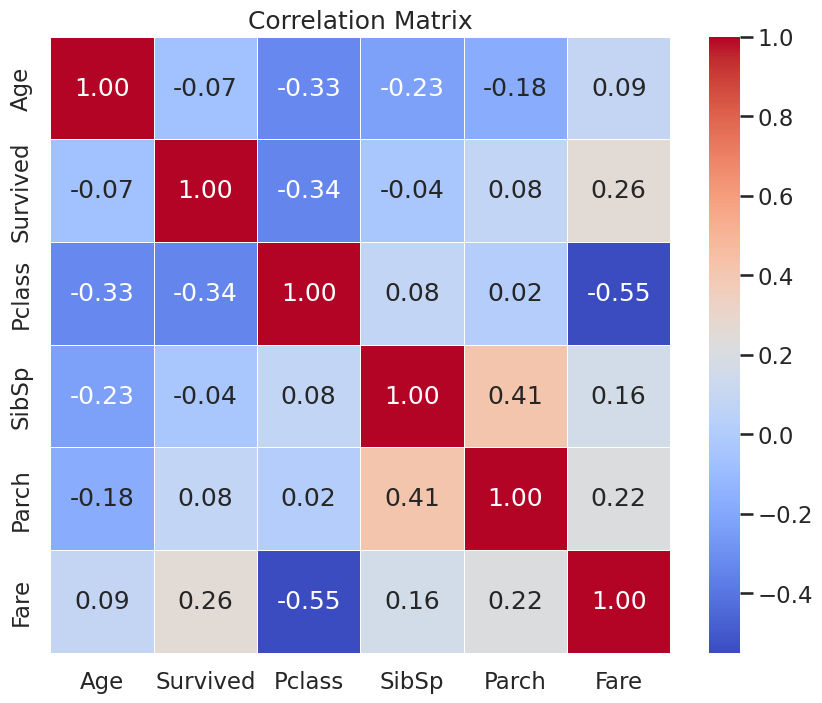

In [15]:
filter_Data = DataSet[['Age', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']]
correlation_matrix = filter_Data.corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

Ваші висновки:


Кореляція Пірсона тут вказує на слабкий зв'язок між віком та виживанням, високий мінусовий зв'язок між класом пасажира та виживанням, слабкий вплив кількості родичів на борту на виживання, та  позитивний зв'язок між вартістю квитка та виживанням.










**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [6]:
def DataFiller(frame,column,method = 'm'):
    if method == 'm':
        mean = frame[column].mean()
        frame[column].fillna(mean, inplace = True)
    if method == 'mo':
        mean = frame[column].mode()[0]
        frame[column].fillna(mean, inplace = True)

DataFiller(DataSet,"Age")

DataFiller(DataSet,"Embarked",'mo')

print(DataSet[DataSet["Age"].isna()])
print(DataSet[DataSet["Embarked"].isna()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


Висновок

Для колонки Age було використано середнє значення, а для Embarked — моду. Це дозволило ефективно вирішити проблему пропущених значень в даних. Після застосування функції перевірка на пропущені значення показала, що відсутні дані були успішно заповнені, що зробило датасет повнішим і готовим до подальших досліджень.


***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні.

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків.


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





In [7]:
DataSet["Age_bin"] = pd.qcut(DataSet["Age"], 4, labels = ['1','2','3','4'])

print(DataSet)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

Ваші висновки:


У завданні було створено категоріальну змінну для віку пасажирів, розділивши віковий діапазон на 5 груп. Це дозволяє легше аналізувати і візуалізувати дані за віковими категоріями. В основному, виживші люди знаходяться в нас під класами 0 та 2, і виходячи з даних,в основному спасали людей,вік яких дозволяв ще працювати та дітей.  



***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали```
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

    fare_group  Survived
0     cheapest         0
1    expensive         1
2        cheap         1
3    expensive         1
4        cheap         0
..         ...       ...
886      cheap         0
887     medium         1
888     medium         0
889     medium         1
890   cheapest         0

[891 rows x 2 columns]


<Axes: xlabel='fare_group'>

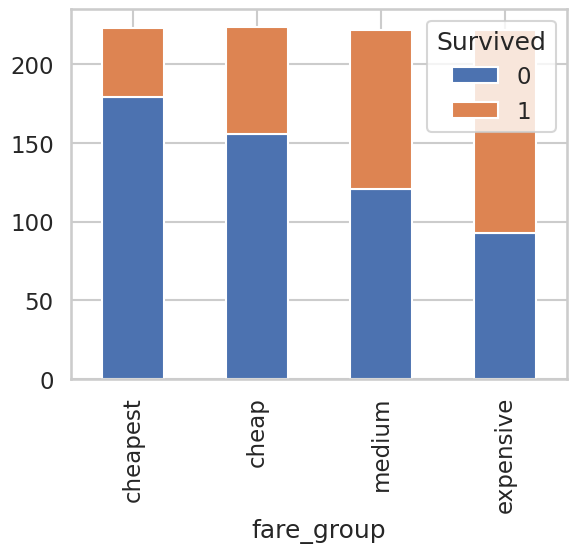

In [8]:
Fare = pd.qcut(DataSet["Fare"], 4 ,labels = ['cheapest','cheap','medium','expensive'])

DataSet['fare_group'] = Fare
print(DataSet[['fare_group','Survived']])

DataSet.groupby(['fare_group','Survived']).size().unstack().plot(kind = 'bar', stacked = True)

Завдання демонструє розподіл вартості квитків на 4 категорії і аналіз виживання пасажирів за цими категоріями. Дивлячись на графік,ми бачимо залежність виживання від вартості квитка. Більша частина людей які мали дорогий квиток вижили, в той час як виживання власників менш дорогих квитків знижується.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [9]:
FamilySize = DataSet['Parch'] + DataSet['SibSp']
Alone = FamilySize.replace(0,'Alone').replace([1,2,3,4,5,6,7,8,9,10], "Family man")

DataSet["FamilySize"] = FamilySize
DataSet["Alone"] = Alone

DataSet.groupby('Alone')['Survived'].mean()

Alone
Alone         0.303538
Family man    0.505650
Name: Survived, dtype: float64

Результати аналізу показують, що пасажири, які подорожували самі, мали менші шанси на виживання , в порівнянні з тими, хто подорожував з сім'єю. Це дозволяє припустити, що наявність сім'ї позитивно корелює з шансами на виживання.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [10]:
DataSet.drop(['Cabin'],axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bin,fare_group,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,cheapest,1,Family man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,4,expensive,1,Family man
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,2,cheap,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,3,expensive,1,Family man
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,3,cheap,0,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,2,cheap,0,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,medium,0,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,2,medium,3,Family man
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,2,medium,0,Alone


Ваші висновки:

Значна кількість відсутніх даних у колонці Cabin може створити труднощі для подальших аналізів



***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [11]:
DataSet['Sex'] = DataSet['Sex'].replace({'female': 1, 'male': 0})
DataSet['Embarked'] = DataSet['Embarked'].replace({'S': 0,'C': 1,'Q': 2})

Ваші висновки:

Категоріальні змінні Sex і Embarked були перетворені в числові для подальшого аналізу даних: жінок закодовано як 1, чоловіків як 0, місця посадки кодуються як 0 для 'S', 1 для 'C', і 2 для 'Q'.


***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



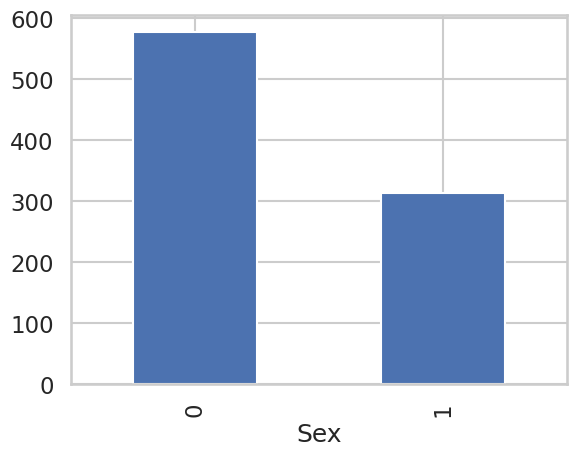

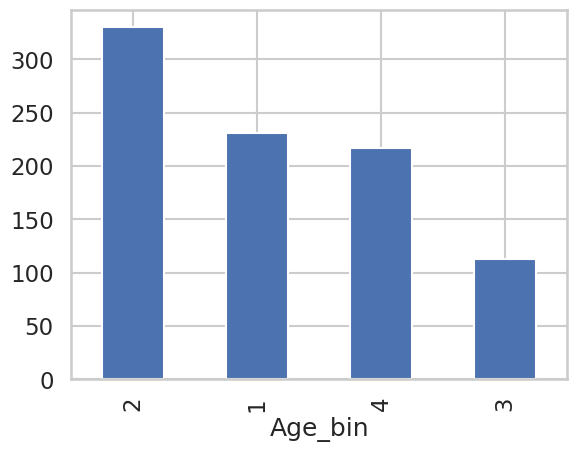

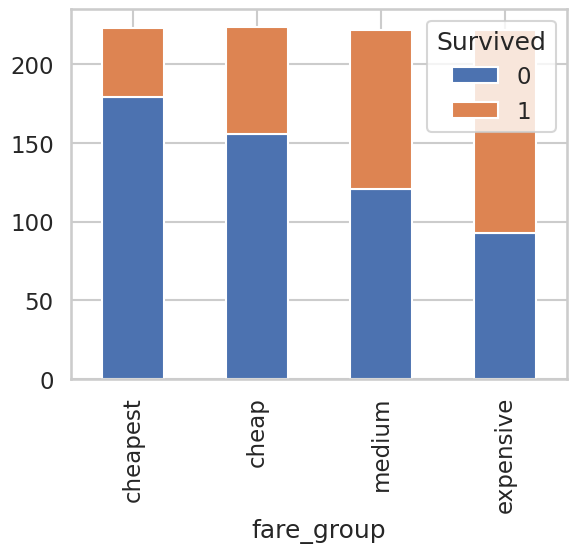

In [12]:
DataSet["Sex"].value_counts().plot(kind='bar', stacked=True)
plt.show()

DataSet["Age_bin"].value_counts().plot(kind='bar', stacked=True)
plt.show()

DataSet.groupby(['fare_group', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

Ваші висновки:
Перший розділ візуалізує кількість спостережень за категоріальною змінною "Sex" у вигляді стовпчастої діаграми.
Другий розділ візуалізує кількість спостережень у кожній категорії вікових груп, які зазначені у змінній "Age_bin".
Третій розділ візуалізує кількість спостережень за групами "fare_group" і "Survived", знову-таки у вигляді стовпчастої діаграми.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

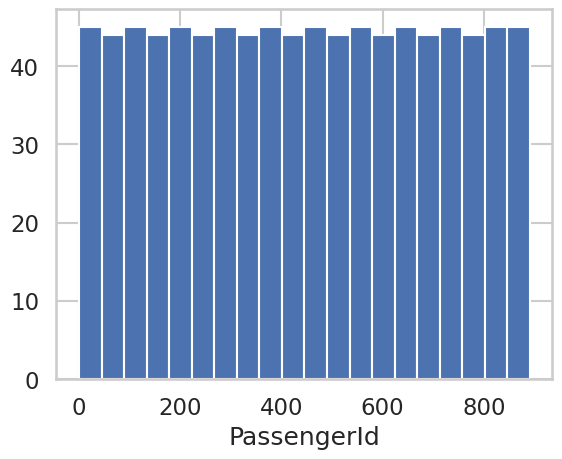

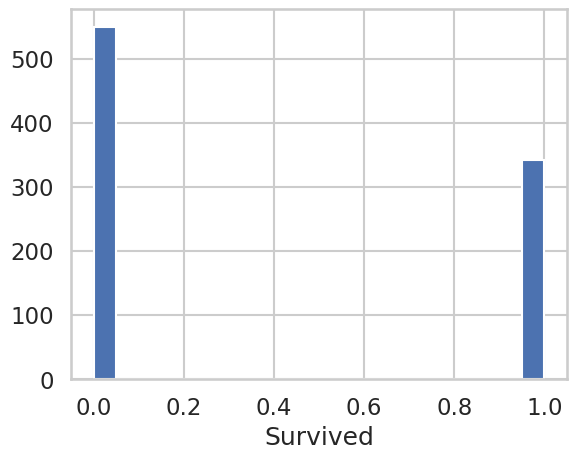

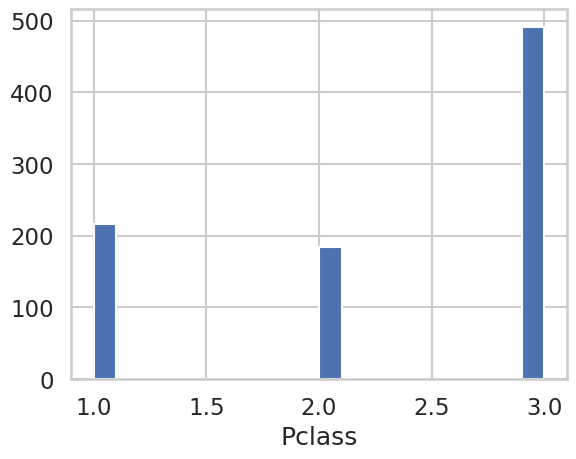

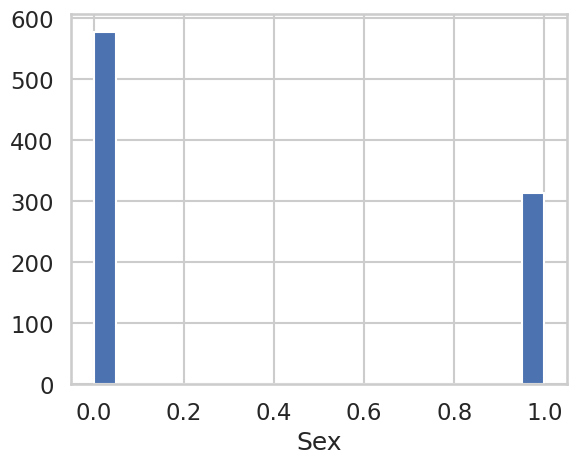

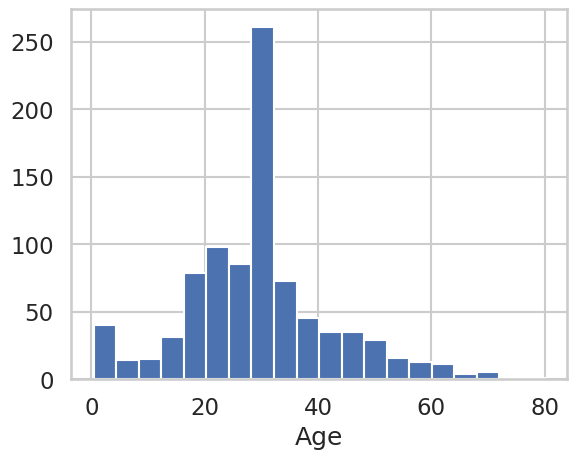

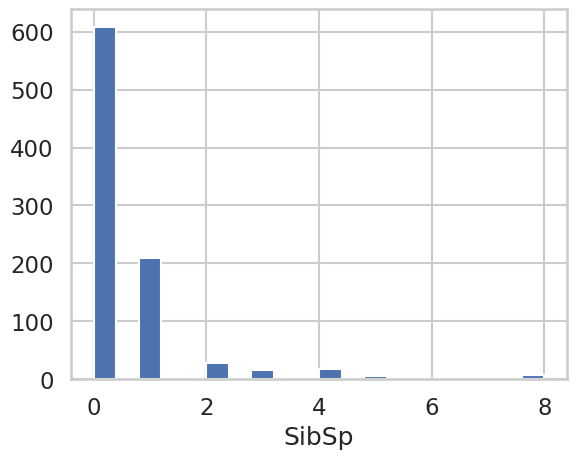

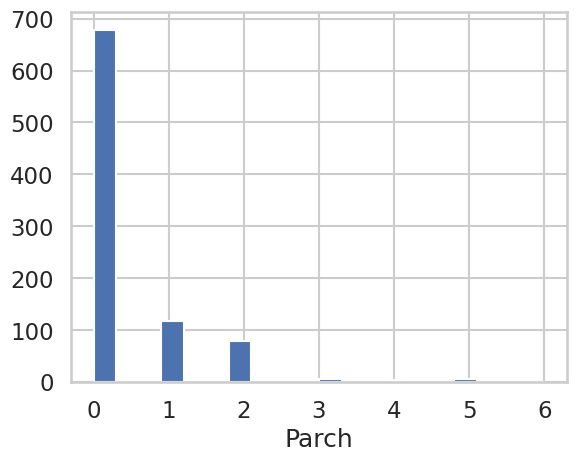

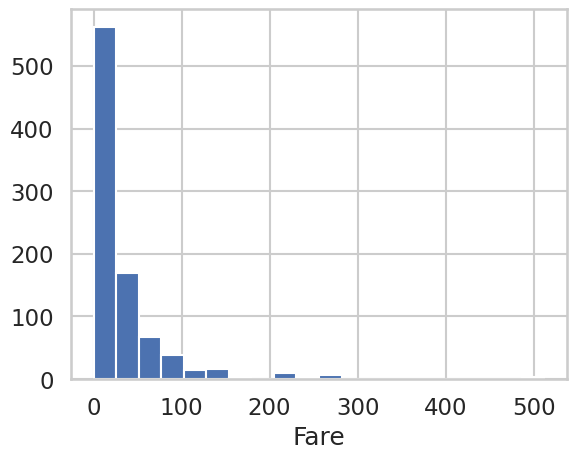

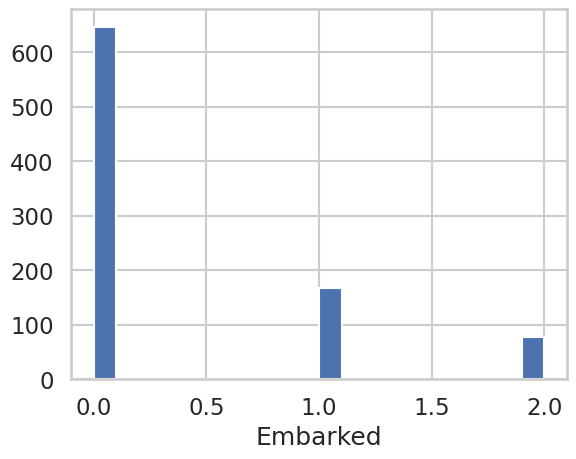

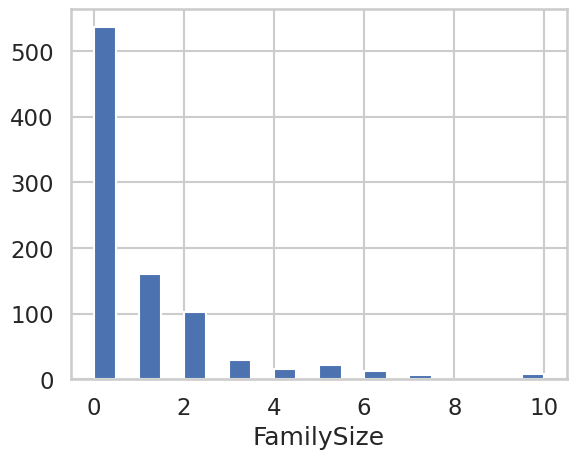

In [13]:
NumCol = DataSet.select_dtypes(include = ['float64','int64'])

for i in NumCol:
    plt.hist(DataSet[i], bins = 20)
    plt.xlabel(i)
    plt.show()

Ваші висновки:

PassengerId:Ідентифікаторів пасажирів
Survived: Більшість пасажирівне вижили(
Pclass: Більшість пасажирів подорожували третім класом, менша кількість пасажирів була в першому та другому класах.
Age: Розподіл віку показує, що більшість пасажирів були молодими , з піком віку близько 20-30 років. Є також помітна кількість маленьких дітей на борту.
SibSp: Більшість пасажирів подорожували без братів чи сестер або подружжя, хоча деяка кількість мала одного або двох супутників.
Parch:Більшість пасажирів не мали батьків або дітей на борту. Однак, є пасажири, які подорожували з одним або двома членами сім'ї.
Fare: Велика кількість пасажирів з низькими тарифами, та значно менша кількість пасажирів, які платили вищі тарифи.
Embarked: Найбільше пасажирів посадили в порту 0, менше в порту 1, і найменше в порту 2.
FamilySize: Більшість пасажирів були самі, декілька мали сім'ї з 1-3 членами.








##Співвіднонешшя між всіма числовими змінними
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:

1. побудувати графіки співвідношення між всіма числовими змінними.
2. описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

In [14]:
#code

Ваші висновки:
1.   ...
2.   ...

Кожне правильно виконане завдання буде оцінюватись в ```1 бали```.